In [1]:
# we initially import the essential libraries and metrics

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Data Exploration and Analysis


# loading data
data_f = pd.read_csv('kentData_New.csv')

In [3]:
# looking at the first 5 rows of the dataset
data_f.head()

,location,price,houseType,rooms,Property ID,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,dartford,600000,detached,4,prop122259050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dartford,725000,detached,4,prop84047001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dartford,725000,detached,4,prop109660931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dartford,700000,detached,4,prop120059177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dartford,700000,detached,4,prop114537404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# extracting relevant column data for analysis

location = data_f['location']
price = data_f['price']
houseType = data_f['houseType']
rooms =data_f['rooms']

In [5]:
# concatenating relevant features into our dataframe
df= pd.concat([location, price, houseType, rooms], axis =1)

In [6]:
# check the dtypes of columns 

df.info()

# object type data to be further process - categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12478 entries, 0 to 12477
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   12478 non-null  object
 1   price      12478 non-null  int64 
 2   houseType  12478 non-null  object
 3   rooms      12478 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 390.1+ KB


In [7]:
# looking at the statistical summmary of the dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,12478.0,307227.302372,144099.414676,27500.0,210000.0,290000.0,375000.0,2200000.0
rooms,12478.0,2.468264,0.904201,1.0,2.0,2.0,3.0,5.0


In [8]:
# look at the shape

df.shape

(12478, 4)

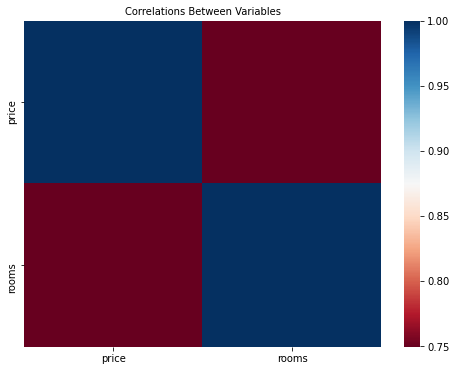

In [9]:
# we can visualise the correlations between numerical variables
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size = 10)
plt.show()

In [10]:
# mean values used to replace missing values ie. 'POA', 'Coming soon' in price columns
#  we can the checking for the missing values


print("Missing Values by Column")
print("-"*25)
print(df.isna().sum())
print("-"*25)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
-------------------------
location     0
price        0
houseType    0
rooms        0
dtype: int64
-------------------------
TOTAL MISSING VALUES: 0


In [11]:
# checking the uniqueness of houseType column

df['houseType'].unique()

array(['detached', 'semi-detached', 'terraced', 'flat', 'bungalow'],
      dtype=object)

In [12]:
# checking the uniqueness of location column
df['location'].unique()

array(['dartford', 'sevenoaks', 'edenbridge', 'tonbridge', 'southborough',
       'royal Tonbridge Wells', 'pembury', 'snodland', 'aylesford',
       'kings Hill', 'west Malling', 'paddock Wood', 'maidstone',
       'bearsted', 'cranbrook', 'staplehurst', 'sheerness',
       'minster on Sea', 'sittingbourne', 'faversham', 'brogdale',
       'ashford', 'kingsnorth', 'new Romney', 'whitstable', 'herne Bay',
       'canterbury', 'hythe', 'folkestone', 'hawkinge', 'birchington',
       'minster', 'sandwich', 'whitfield', 'dover', 'deal', 'ramsgate',
       'broadstairs', 'margate'], dtype=object)

In [13]:
# Categorical features in dataset are encoded by using One-Hot Encoding method

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [14]:
# Categortical data is encoded here -handling one per time - 
#location
ohe.fit_transform(df[['location']]).toarray().transpose()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# let's call this our feature_array
feature_array = ohe.fit_transform(df[['location']]).toarray()

In [16]:
# we can check the new categories created from ohe
ohe.categories_

[array(['ashford', 'aylesford', 'bearsted', 'birchington', 'broadstairs',
        'brogdale', 'canterbury', 'cranbrook', 'dartford', 'deal', 'dover',
        'edenbridge', 'faversham', 'folkestone', 'hawkinge', 'herne Bay',
        'hythe', 'kings Hill', 'kingsnorth', 'maidstone', 'margate',
        'minster', 'minster on Sea', 'new Romney', 'paddock Wood',
        'pembury', 'ramsgate', 'royal Tonbridge Wells', 'sandwich',
        'sevenoaks', 'sheerness', 'sittingbourne', 'snodland',
        'southborough', 'staplehurst', 'tonbridge', 'west Malling',
        'whitfield', 'whitstable'], dtype=object)]

In [18]:
# these heaading becomes our feature labels
feature_labels = ohe.categories_ 
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['ashford' 'aylesford' 'bearsted' 'birchington' 'broadstairs' 'brogdale'
 'canterbury' 'cranbrook' 'dartford' 'deal' 'dover' 'edenbridge'
 'faversham' 'folkestone' 'hawkinge' 'herne Bay' 'hythe' 'kings Hill'
 'kingsnorth' 'maidstone' 'margate' 'minster' 'minster on Sea'
 'new Romney' 'paddock Wood' 'pembury' 'ramsgate' 'royal Tonbridge Wells'
 'sandwich' 'sevenoaks' 'sheerness' 'sittingbourne' 'snodland'
 'southborough' 'staplehurst' 'tonbridge' 'west Malling' 'whitfield'
 'whitstable']


In [19]:
# making a dataframe from our feature array
pd.DataFrame(feature_array, columns = feature_labels)

,ashford,aylesford,bearsted,birchington,broadstairs,brogdale,canterbury,cranbrook,dartford,deal,...,sevenoaks,sheerness,sittingbourne,snodland,southborough,staplehurst,tonbridge,west Malling,whitfield,whitstable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# new variables/headings  & printing first 5 rows
features = pd.DataFrame(feature_array, columns = feature_labels)
features.head()

,ashford,aylesford,bearsted,birchington,broadstairs,brogdale,canterbury,cranbrook,dartford,deal,...,sevenoaks,sheerness,sittingbourne,snodland,southborough,staplehurst,tonbridge,west Malling,whitfield,whitstable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# now we bring both data and the featured part together
pd.concat([df,features], axis =1)

,location,price,houseType,rooms,ashford,aylesford,bearsted,birchington,broadstairs,brogdale,...,sevenoaks,sheerness,sittingbourne,snodland,southborough,staplehurst,tonbridge,west Malling,whitfield,whitstable
0,dartford,600000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,dartford,725000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,dartford,725000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dartford,700000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,dartford,700000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12473,margate,300000,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12474,margate,300000,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12475,margate,300000,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12476,margate,297500,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# let's place this into a new variable called data1
data1 = pd.concat([df,features], axis =1)

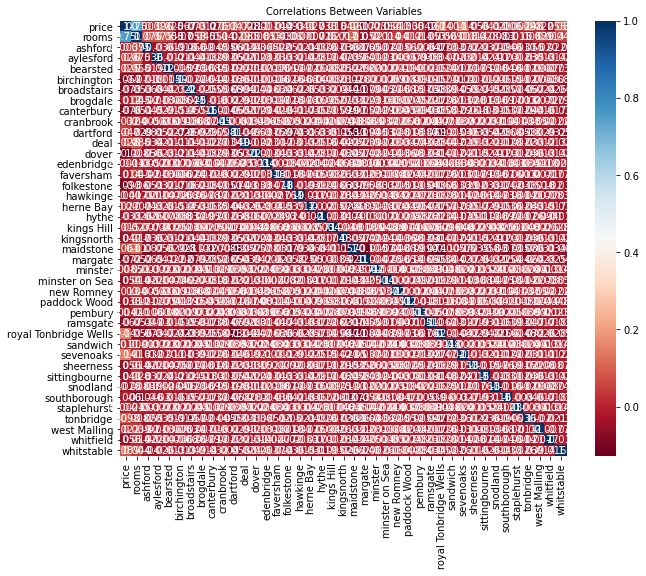

In [23]:
# correlation plot
plt.figure(figsize=(10,8))
corr = data1.corr()
sns.heatmap(corr, cmap="RdBu", annot= True);
plt.title("Correlations Between Variables", size = 10)
plt.show()

In [24]:
# Handling houseType data column
df['houseType'].unique()

array(['detached', 'semi-detached', 'terraced', 'flat', 'bungalow'],
      dtype=object)

In [26]:
# our object type data is encoded here
ohe.fit_transform(df[['houseType']]).toarray().transpose()

array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# let's call this our feature_array1
feature_array1 = ohe.fit_transform(df[['houseType']]).toarray()

In [28]:
ohe.categories_

[array(['bungalow', 'detached', 'flat', 'semi-detached', 'terraced'],
       dtype=object)]

In [29]:
# these heading becomes our feature labels for house type
feature_labels1 = ohe.categories_ 

In [30]:
# new variables/headings 
features = pd.DataFrame(feature_array1, columns = feature_labels1)
features.head()

,bungalow,detached,flat,semi-detached,terraced
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [31]:
# now we bring both data and the featured part together
pd.concat([data1,features], axis =1)

,location,price,houseType,rooms,ashford,aylesford,bearsted,birchington,broadstairs,brogdale,...,staplehurst,tonbridge,west Malling,whitfield,whitstable,"(bungalow,)","(detached,)","(flat,)","(semi-detached,)","(terraced,)"
0,dartford,600000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,dartford,725000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,dartford,725000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,dartford,700000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,dartford,700000,detached,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12473,margate,300000,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12474,margate,300000,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12475,margate,300000,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12476,margate,297500,bungalow,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
df=pd.concat([data1,features], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12478 entries, 0 to 12477
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               12478 non-null  object 
 1   price                  12478 non-null  int64  
 2   houseType              12478 non-null  object 
 3   rooms                  12478 non-null  int64  
 4   ashford                12478 non-null  float64
 5   aylesford              12478 non-null  float64
 6   bearsted               12478 non-null  float64
 7   birchington            12478 non-null  float64
 8   broadstairs            12478 non-null  float64
 9   brogdale               12478 non-null  float64
 10  canterbury             12478 non-null  float64
 11  cranbrook              12478 non-null  float64
 12  dartford               12478 non-null  float64
 13  deal                   12478 non-null  float64
 14  dover                  12478 non-null  float64
 15  ed

In [33]:
# Taking a look at the shape our new dataFrame
df.shape

(12478, 48)

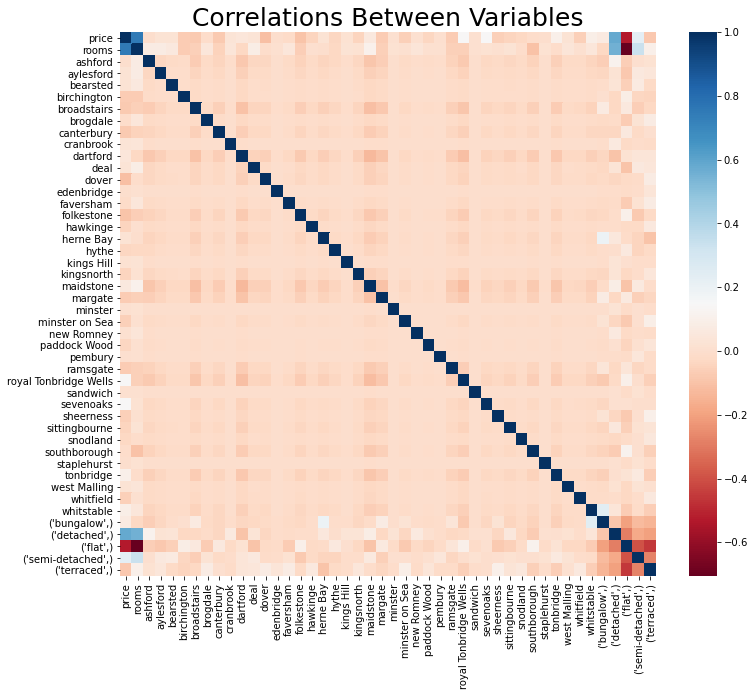

In [34]:
# now to visualise the relationship between numerical variables atfetr one-hot-encode categorical data
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=25)
plt.show()

In [39]:
# SUPERVISED MACHINE LEARNING

# x,y split
# Splitting the data into X and y chunks ---

x1 = df.drop("price", axis=1) # droping price columns and assign it to our dependend variable y.
y = df["price"] # independent variable  y

In [40]:
x2 = x1.drop("houseType", axis=1) # droping the housetype column
X = x2.drop("location", axis=1) # droping price + location column

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [42]:
# building a linear regression on the train set
from sklearn.linear_model import LinearRegression
# create an instance of the LR module/function and use it on train test
# to find the best fit model on the on traning data
# gradient descent is invoked here

In [56]:
# Defining function for purposes of evaluations
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [57]:
# Machine Learning Models
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [58]:
# creating an object of the Linear Regression Model
lr = LinearRegression() 
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 51036.60096153846
MSE: 6149688079.828526
RMSE: 78419.94695119683
R2 Score: 0.7210094777137463
------------------------------
RMSE Cross-Validation: 3.694006694242466e+16


In [59]:
# r^2 = 1 -rss/tss => r-square score as above. # this checks the goodness of fit of our module aka the 
# coefficient of determination 
lr.score(X_test, y_test)

0.7210094777137463

In [60]:
#extracting the LR statistical coeffients of the indenpendent variables
coeff_data = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

In [61]:
coeff_data

,Coefficient
rooms,8.607750e+04
ashford,1.673254e+15
aylesford,1.673254e+15
bearsted,1.673254e+15
birchington,1.673254e+15
broadstairs,1.673254e+15
brogdale,1.673254e+15
canterbury,1.673254e+15
cranbrook,1.673254e+15
dartford,1.673254e+15


In [62]:
print(lr.intercept_)

-2.0080968393590308e+16


In [63]:
#we can take a look at the actual test set and predicted values for y
y_test.head(), predictions[0:5] # to see just the first 5 test and predicted values(array)

(8665     281000
 12433    260000
 8496      60000
 9994     360000
 4779     325000
 Name: price, dtype: int64,
 array([462488., 309528., 126924., 319324., 351476.]))

In [64]:
# R-square Score scores 72 meaning 72% of the data is captured by our predicction module
lr.score(X_test, y_test)

0.7210094777137463

In [65]:
# Improving the LR model with R stats using smf
# similar to r stats. we combine all the train x and y values ...concat
import statsmodels.formula.api as smf

In [66]:
combine_data = pd.concat([y_train, X_train], axis =1)
combine_data.T

,3299,1087,9880,2335,9915,7652,7356,1454,5431,4900,...,4426,466,6265,5734,11284,11964,5191,5390,860,7270
price,175000.0,250000.0,170000.0,400000.0,100000.0,249995.0,270000.0,104000.0,260000.0,390000.0,...,490000.0,280000.0,220000.0,340000.0,290000.0,165000.0,290000.0,67500.0,170000.0,260000.0
rooms,1.0,2.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,4.0,...,4.0,2.0,3.0,3.0,2.0,1.0,3.0,1.0,1.0,3.0
ashford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aylesford,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bearsted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
birchington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
broadstairs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
brogdale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
canterbury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cranbrook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Looking at the statistical results of using R

mod = smf.ols('y_train ~ X_train', data = combine_data)
res = mod.fit()
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     715.6
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        10:19:34   Log-Likelihood:            -1.2562e+05
No. Observations:                9982   AIC:                         2.513e+05
Df Residuals:                    9938   BIC:                         2.516e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.081e+04   4009.590     17.661      

In [68]:
# Shows an improvemnet in R-squared/ goodness of fit from 72- 76% 
# Intercept result more realistic figure compared to LRM

In [69]:
#Polymnomial of 2ND degree
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lreg = LinearRegression()
lreg.fit(X_train_2d, y_train)
Poly_predictions = lreg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lreg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 51036.60096153846
MSE: 6149688079.828526
RMSE: 78419.94695119683
R2 Score: 0.7210094777137463
------------------------------
RMSE Cross-Validation: 3.694006694242466e+16


In [70]:
lreg.intercept_

-7910985655029189.0

In [71]:
lreg.coef_

array([-2.38533686e+12,  1.51669789e+16,  4.40949941e+15, ...,
       -4.07941440e+14,  0.00000000e+00,  3.23135817e+15])

In [72]:
# we can take a look at the actual test set and predicted values for y
y_test.head(), Poly_predictions[0:5] # to see just the first 5 test and predicted values(array)

(8665     281000
 12433    260000
 8496      60000
 9994     360000
 4779     325000
 Name: price, dtype: int64,
 array([293003., 323519., 131199., 304456., 355562.]))

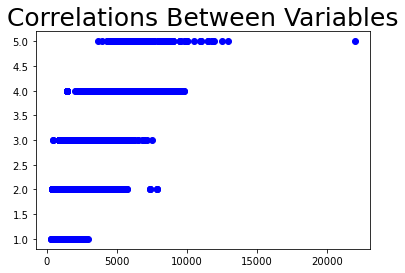

In [73]:
# Correlation between varibales shows a liniear relations. Polynomial not a good fit.
plt.scatter(df['price']/100, df['rooms'], color="blue")
plt.title("Correlations Between Variables", size=25)
plt.show()

In [74]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictionsB = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 51036.60096153846
MSE: 6149688079.828526
RMSE: 78419.94695119683
R2 Score: 0.7210094777137463
------------------------------
RMSE Cross-Validation: 92728.06691109276


In [75]:
# Once again from XGBoost Regressor our predictive model is captured by 72% of the data

In [76]:
# we can take a look at the actual test set and predicted values for y
y_test.head(), predictionsB[0:5] # to see just the first 5 test and predicted values(array)

(8665     281000
 12433    260000
 8496      60000
 9994     360000
 4779     325000
 Name: price, dtype: int64,
 array([369194.7 , 322123.84, 126396.58, 326228.97, 345877.78],
       dtype=float32))

In [77]:
# OLS Regression Results  shows better prediction 
# Extrating coeffienct for the prediction module

intercept  =  7.081e+04   
rooms      =    8.609e+04   
ashford    =  -8387.7891   
aylesford  =   5742.2679  
bearsted   = 2272.7153   
birchington =   1.028e+04   
broadstairs =   1.981e+04   
brogdale   =  -2.54e+04   
canterbury =  2.06e+04   
cranbrook  = -2.209e+04   
dartford   =   7.667e+04   
deal       = -7175.8266  
dover      = -4.864e+04   
edenbridge = 3495.5067   
faversham  = -1.965e+04   
folkestone =  9114.7447   
hawkinge   = -2.608e+04   
herneBay   =  2.438e+04   
hythe      =  2.318e+04   
kingsHill  = -1.294e+04  
kingsnorth = -1.464e+04  
maidstone  =  2.496e+04   
margate    =  1.853e+04   
minster    = -2.038e+04  
minsterOnSea =  -5.338e+04   
newRommeny = -1.389e+05  
paddockWood = -7.708e+04   
pembury    =  2.139e+04       
ramsgate   =  1.577e+04      
royalTonbridgeWells =  1.291e+05   
sandwich   =  2.561e+04       
sevenoaks  =  1.742e+05  
sheerness   = -5.633e+04   
sittingbourne =  -3.004e+04  
snodland   =  1.396e+04   
southborough =  9.787e+04  
staplehurst =  -2.14e+05  
tonbridge  =  1.006e+05   
westMalling =  2.924e+04  
whitfield  = -5.469e+04   
whitstable =  5.385e+04   
bungalow = b   =    4.8e+04   
detached = d  =  1.102e+05   
flat   = f    =  -5.058e+04   
semiDetached= sd = -2578.1692   
terraced = t  = -3.424e+04   

#value = intercept + roomCoef * rooms + houseTypeCoef[i]   + locationCoef[i]  

propertyType =[b, d, f, sd, t]

location = [ ashford, aylesford , bearsted , birchington , broadstairs
 ,brogdale ,canterbury, cranbrook ,dartford , deal , dover , edenbridge ,faversham ,folkestone ,hawkinge ,herneBay ,
hythe , kingsHill , kingsnorth, maidstone, margate, minster, minsterOnSea, newRommeny, paddockWood,pembury,
ramsgate, royalTonbridgeWells, sandwich, sevenoaks, sheerness, sittingbourne, snodland , southborough,
staplehurst, tonbridge, westMalling, whitfield, whitstable]

predictedValue = intercept + rooms + (b + d - f - sd - t) +(- ashford + aylesford + bearsted + birchington + broadstairs
 - brogdale + canterbury - cranbrook + dartford - deal - dover + edenbridge - faversham + folkestone - hawkinge +herneBay +
hythe - kingsHill - kingsnorth + maidstone +margate-minster-minsterOnSea - newRommeny - paddockWood+pembury +
ramsgate + royalTonbridgeWells + sandwich + sevenoaks - sheerness - sittingbourne + snodland + southborough-
staplehurst + tonbridge + westMalling - whitfield + whitstable)


def valuePrediction(room, ptype, loc):
    value = room * rooms
    for i in propertyType:
        if ptype == i:
            value+=i
    for j in location:
        if loc == j:
            value+=j
    value+=intercept
    return int(round(value,0))


valuePrediction(2, t, dartford)

285420